In [64]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

# Scraping data from real website + pandas
# (Get table that we want to use as a data for pandas datarame)

In [65]:
from bs4 import BeautifulSoup
import requests

In [66]:
url ='https://en.wikipedia.org/wiki/List_of_largest_companies_in_the_United_States_by_revenue'

In [67]:
page = requests.get(url)

In [68]:
soup = BeautifulSoup(page.text, 'html') #after comas its called parser which is disini 'html'

In [69]:
print(soup)

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of largest companies in the United States by revenue - Wikipedia</title>
<script>document.documentElement.className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled";(function(){var cookie=docum

In [70]:
soup.find('table') #this is not the table that we are looking for, the website has a lot of table tag ofc

<table class="box-More_citations_needed plainlinks metadata ambox ambox-content ambox-Refimprove" role="presentation"><tbody><tr><td class="mbox-image"><div class="mbox-image-div"><span typeof="mw:File"><a class="mw-file-description" href="/wiki/File:Question_book-new.svg"><img alt="" class="mw-file-element" data-file-height="399" data-file-width="512" decoding="async" height="39" src="//upload.wikimedia.org/wikipedia/en/thumb/9/99/Question_book-new.svg/50px-Question_book-new.svg.png" srcset="//upload.wikimedia.org/wikipedia/en/thumb/9/99/Question_book-new.svg/75px-Question_book-new.svg.png 1.5x, //upload.wikimedia.org/wikipedia/en/thumb/9/99/Question_book-new.svg/100px-Question_book-new.svg.png 2x" width="50"/></a></span></div></td><td class="mbox-text"><div class="mbox-text-span">This article <b>needs additional citations for <a href="/wiki/Wikipedia:Verifiability" title="Wikipedia:Verifiability">verification</a></b>.<span class="hide-when-compact"> Please help <a class="external tex

In [71]:
soup.find_all('table')

[<table class="box-More_citations_needed plainlinks metadata ambox ambox-content ambox-Refimprove" role="presentation"><tbody><tr><td class="mbox-image"><div class="mbox-image-div"><span typeof="mw:File"><a class="mw-file-description" href="/wiki/File:Question_book-new.svg"><img alt="" class="mw-file-element" data-file-height="399" data-file-width="512" decoding="async" height="39" src="//upload.wikimedia.org/wikipedia/en/thumb/9/99/Question_book-new.svg/50px-Question_book-new.svg.png" srcset="//upload.wikimedia.org/wikipedia/en/thumb/9/99/Question_book-new.svg/75px-Question_book-new.svg.png 1.5x, //upload.wikimedia.org/wikipedia/en/thumb/9/99/Question_book-new.svg/100px-Question_book-new.svg.png 2x" width="50"/></a></span></div></td><td class="mbox-text"><div class="mbox-text-span">This article <b>needs additional citations for <a href="/wiki/Wikipedia:Verifiability" title="Wikipedia:Verifiability">verification</a></b>.<span class="hide-when-compact"> Please help <a class="external te

In [72]:
soup.find_all('table')[1]
#we can use indexing since its a list
#(all of the tag that has table tag separated by comma with this beautifulsoup function)

<table class="wikitable sortable">
<caption>
</caption>
<tbody><tr>
<th>Rank
</th>
<th>Name
</th>
<th>Industry
</th>
<th>Revenue <br/>(USD millions)
</th>
<th>Revenue growth
</th>
<th>Employees
</th>
<th>Headquarters
</th></tr>
<tr>
<td>1
</td>
<td><a href="/wiki/Walmart" title="Walmart">Walmart</a>
</td>
<td><a href="/wiki/Retail" title="Retail">Retail</a>
</td>
<td style="text-align:center;">611,289
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" class="mw-file-element" data-file-height="300" data-file-width="300" decoding="async" height="11" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" width="11"/></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 6.

In [73]:
table_we_are_looking_for = soup.find_all('table')[1]

In [74]:
#title_of_table_we_are_looking_for = soup.find_all('th')[:7] we can use this, but below is better 
#cause we take title from the table that we are looking for

title_of_table_we_are_looking_for = table_we_are_looking_for.find_all('th')

In [75]:
title_of_table_we_are_looking_for

[<th>Rank
 </th>,
 <th>Name
 </th>,
 <th>Industry
 </th>,
 <th>Revenue <br/>(USD millions)
 </th>,
 <th>Revenue growth
 </th>,
 <th>Employees
 </th>,
 <th>Headquarters
 </th>]

In [76]:
text_title_of_table_we_are_looking_for = [title.text for title in title_of_table_we_are_looking_for]

In [77]:
text_title_of_table_we_are_looking_for

['Rank\n',
 'Name\n',
 'Industry\n',
 'Revenue (USD millions)\n',
 'Revenue growth\n',
 'Employees\n',
 'Headquarters\n']

In [78]:
text_title_of_table_we_are_looking_for = [title.text.strip() for title in title_of_table_we_are_looking_for]
text_title_of_table_we_are_looking_for

['Rank',
 'Name',
 'Industry',
 'Revenue (USD millions)',
 'Revenue growth',
 'Employees',
 'Headquarters']

# Start Using Pandas Dataframe

In [79]:
import pandas as pd

In [80]:
df = pd.DataFrame(columns = text_title_of_table_we_are_looking_for)
df

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters


In [81]:
column_data = table_we_are_looking_for.find_all('tr') #this is row of data (rank, name, industry, so on)

In [82]:
for row in column_data:
    row_data = row.find_all('td') #td is individual data
    individual_row_data = [data.text.strip() for data in row_data]
    print(individual_row_data)

[]
['1', 'Walmart', 'Retail', '611,289', '6.7%', '2,100,000', 'Bentonville, Arkansas']
['2', 'Amazon', 'Retail and Cloud Computing', '513,983', '9.4%', '1,540,000', 'Seattle, Washington']
['3', 'Exxon Mobil', 'Petroleum industry', '413,680', '44.8%', '62,000', 'Spring, Texas']
['4', 'Apple', 'Electronics industry', '394,328', '7.8%', '164,000', 'Cupertino, California']
['5', 'UnitedHealth Group', 'Healthcare', '324,162', '12.7%', '400,000', 'Minnetonka, Minnesota']
['6', 'CVS Health', 'Healthcare', '322,467', '10.4%', '259,500', 'Woonsocket, Rhode Island']
['7', 'Berkshire Hathaway', 'Conglomerate', '302,089', '9.4%', '383,000', 'Omaha, Nebraska']
['8', 'Alphabet', 'Technology', '282,836', '9.8%', '156,000', 'Mountain View, California']
['9', 'McKesson Corporation', 'Health', '276,711', '4.8%', '48,500', 'Irving, Texas']
['10', 'Chevron Corporation', 'Petroleum industry', '246,252', '51.6%', '43,846', 'San Ramon, California']
['11', 'AmerisourceBergen', 'Pharmaceutical industry', '238,

In [83]:
for row in column_data[1:]:
    row_data = row.find_all('td') #td is individual data
    individual_row_data = [data.text.strip() for data in row_data]
    print(individual_row_data)

['1', 'Walmart', 'Retail', '611,289', '6.7%', '2,100,000', 'Bentonville, Arkansas']
['2', 'Amazon', 'Retail and Cloud Computing', '513,983', '9.4%', '1,540,000', 'Seattle, Washington']
['3', 'Exxon Mobil', 'Petroleum industry', '413,680', '44.8%', '62,000', 'Spring, Texas']
['4', 'Apple', 'Electronics industry', '394,328', '7.8%', '164,000', 'Cupertino, California']
['5', 'UnitedHealth Group', 'Healthcare', '324,162', '12.7%', '400,000', 'Minnetonka, Minnesota']
['6', 'CVS Health', 'Healthcare', '322,467', '10.4%', '259,500', 'Woonsocket, Rhode Island']
['7', 'Berkshire Hathaway', 'Conglomerate', '302,089', '9.4%', '383,000', 'Omaha, Nebraska']
['8', 'Alphabet', 'Technology', '282,836', '9.8%', '156,000', 'Mountain View, California']
['9', 'McKesson Corporation', 'Health', '276,711', '4.8%', '48,500', 'Irving, Texas']
['10', 'Chevron Corporation', 'Petroleum industry', '246,252', '51.6%', '43,846', 'San Ramon, California']
['11', 'AmerisourceBergen', 'Pharmaceutical industry', '238,587

In [84]:
for row in column_data[1:]:
    row_data = row.find_all('td') #td is individual data
    individual_row_data = [data.text.strip() for data in row_data]
    
    length = len(df)
    df.loc[length] = individual_row_data

In [85]:
print(df)

   Rank                      Name                    Industry  \
0     1                   Walmart                      Retail   
1     2                    Amazon  Retail and Cloud Computing   
2     3               Exxon Mobil          Petroleum industry   
3     4                     Apple        Electronics industry   
4     5        UnitedHealth Group                  Healthcare   
..  ...                       ...                         ...   
95   96                  Best Buy                      Retail   
96   97      Bristol-Myers Squibb     Pharmaceutical industry   
97   98           United Airlines                     Airline   
98   99  Thermo Fisher Scientific      Laboratory instruments   
99  100                  Qualcomm                  Technology   

   Revenue (USD millions) Revenue growth  Employees             Headquarters  
0                 611,289           6.7%  2,100,000    Bentonville, Arkansas  
1                 513,983           9.4%  1,540,000      Seat

# Export to CSV File

In [86]:
df.to_csv(r'D:\FILE DATA ANALYST\Belajar Jupyter Notebook\Top 100 USA Companies by Revenue.csv', index=False)

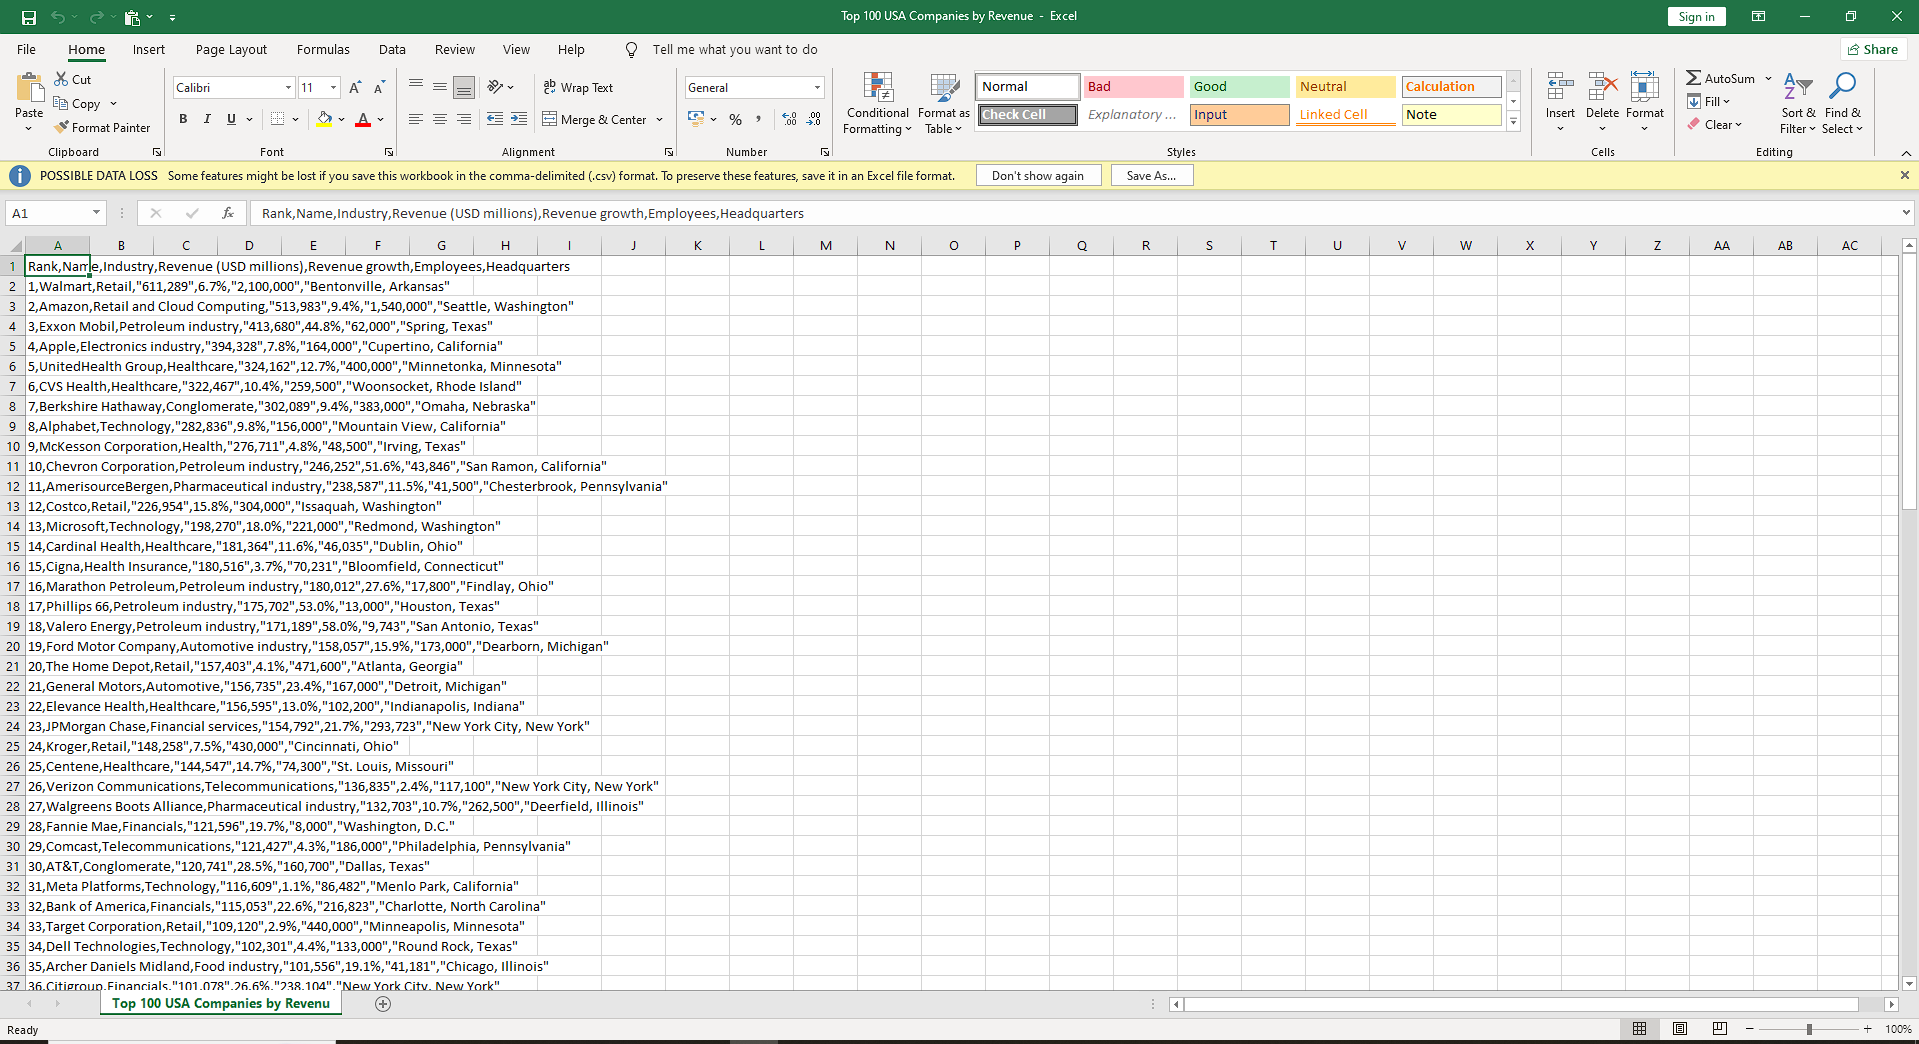